### Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import os

### Defining Stock List for Analysis

In [2]:
stocks = ["ADANIPORTS.csv", "ASIANPAINT.csv", "AXISBANK.csv", "BAJAJ-AUTO.csv", 
          "BAJAJFINSV.csv", "BPCL.csv", "BRITANNIA.csv", "CIPLA.csv", 
          "COALINDIA.csv", "DRREDDY.csv"]
data_dir = "../data/"

### Load Data Function

In [ ]:
def load_stock_data(stock_file, data_dir="../data/"):
    file_path = os.path.join(data_dir, stock_file)
    if not os.path.exists(file_path):
        print(f"Error: {file_path} not found.")
        return None
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    return df

## Load All Stocks into a Dictionary

In [ ]:
data_dict = {stock: load_stock_data(stock) for stock in stocks}
for stock, df in data_dict.items():
    if df is not None:
        df.set_index('Date', inplace=True)

## Checking Loaded Data

In [ ]:

for stock, df in data_dict.items():
    if df is not None:
        print(f"{stock} - Rows: {len(df)}, Columns: {df.columns.tolist()}")

## Summary Statistics for All Stocks

In [ ]:
for stock, df in data_dict.items():
    if df is not None:
        print(f"\nSummary Statistics for {stock}:")
        print(df[['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']].describe())

## Ploting closing for all  stocks

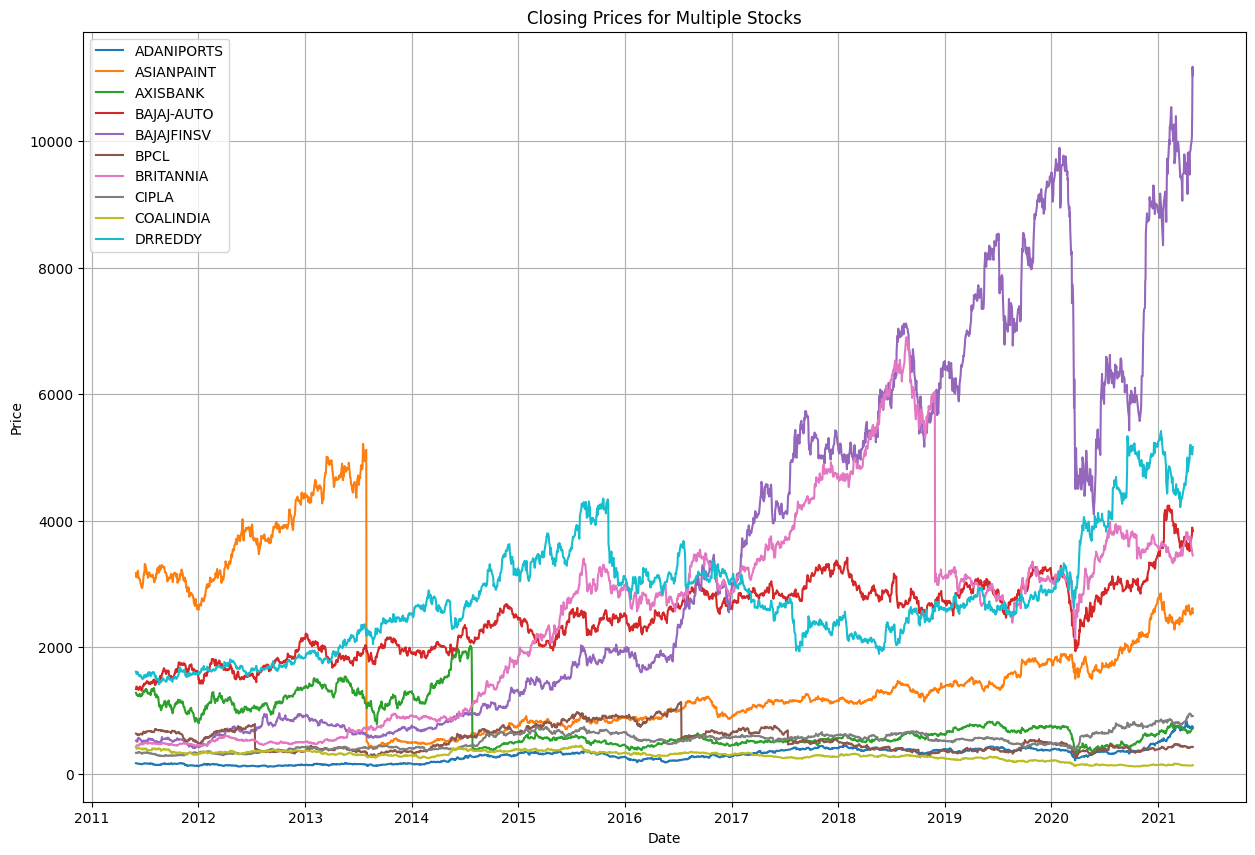

In [3]:
plt.figure(figsize=(15, 10))
for stock, df in data_dict.items():
    if df is not None:
        plt.plot(df.index, df['Close'], label=stock.replace('.csv', ''))
plt.title('Closing Prices for Multiple Stocks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

##Trading Volume for All Stocks

In [ ]:
plt.figure(figsize=(15, 10))
for stock, df in data_dict.items():
    if df is not None:
        plt.plot(df.index, df['Volume'], label=stock.replace('.csv', ''))
plt.title('Trading Volume for Multiple Stocks')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

## Rolling Mean and Standard Deviation for ADANIPORTS

In [ ]:
df = data_dict['ADANIPORTS.csv']
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['Close'].rolling(window=20).mean(), label='20-Day MA')
plt.plot(df.index, df['Close'].rolling(window=20).std(), label='20-Day Std')
plt.title('Rolling Stats for ADANIPORTS')
plt.legend()
plt.grid()
plt.show()

## Seasonal Decomposition for ADANIPORTS

In [ ]:
result = seasonal_decompose(df['Close'], model='additive', period=252)
result.plot()
plt.suptitle('Seasonal Decomposition for ADANIPORTS')
plt.show()

## Daily Returns for ADANIPORTS

In [ ]:
df['Daily_Return'] = df['Close'].pct_change()
plt.figure(figsize=(12, 6))
plt.hist(df['Daily_Return'].dropna(), bins=50, color='green')
plt.title('Distribution of Daily Returns for ADANIPORTS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Volatility (Rolling Standard Deviation) for ADANIPORTS

In [ ]:
df['Volatility'] = df['Close'].rolling(window=20).std()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volatility'], label='20-Day Volatility')
plt.title('Volatility for ADANIPORTS')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid()
plt.show()

### Correlation Heatmap for ADANIPORTS

In [ ]:
plt.figure(figsize=(10, 8))
corr = df[['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for ADANIPORTS')
plt.show()

## Pairplot for ADANIPORTS

In [ ]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']].dropna())
plt.suptitle('Pairplot for ADANIPORTS')
plt.show()

## Pairplot for ADANIPORTS

In [ ]:
closing_prices = pd.DataFrame({stock.replace('.csv', ''): df['Close'] for stock, df in data_dict.items() if df is not None})
plt.figure(figsize=(12, 6))
closing_prices.boxplot()
plt.title('Box Plot of Closing Prices Across Stocks')
plt.ylabel('Price')
plt.show()

## for Missing Values

In [ ]:
for stock, df in data_dict.items():
    if df is not None:
        print(f"\nMissing Values in {stock}:")
        print(df.isnull().sum())

In [ ]:
# Fill or Drop Missing Values
for stock, df in data_dict.items():
    if df is not None:
        df.fillna(method='ffill', inplace=True)
        df.dropna(inplace=True)
        print(f"{stock} - Rows after cleaning: {len(df)}")

In [ ]:
## Autocorrelation Plot for ADANIPORTS Close

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12, 6))
plot_acf(df['Close'].dropna(), lags=50)
plt.title('Autocorrelation for ADANIPORTS Close')
plt.show()

## Stationarity Test (ADF Test) for ADANIPORTS

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Close'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])